In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#add layer : dense, hidden , no od neurons
#delta wait= w2-w1


In [ ]:
#gender geography, drop surname
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'] , inplace=True)

In [ ]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Geography']=label_encoder.fit(df['Geography'])
df['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [ ]:
x=df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.33, random_state=42)


In [ ]:
x

array([[4.2000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [4.1000000e+01, 1.0000000e+00, 8.3807860e+04, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [4.2000000e+01, 8.0000000e+00, 1.5966080e+05, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [3.6000000e+01, 7.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [4.2000000e+01, 3.0000000e+00, 7.5075310e+04, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [2.8000000e+01, 4.0000000e+00, 1.3014279e+05, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [ ]:
scaler=preprocessing.StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

xtrain.mean()

3.9708582311881077e-16

In [ ]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#training
ann.fit(xtrain, ytrain, batch_size = 9, epochs = 20)


Epoch 1/20
745/745 [==============================] - 2s 2ms/step - loss: 0.5207 - accuracy: 0.7703
Epoch 2/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4494 - accuracy: 0.7919
Epoch 3/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7915
Epoch 4/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.7925
Epoch 5/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.7964
Epoch 6/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8048
Epoch 7/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4076 - accuracy: 0.8121
Epoch 8/20
745/745 [==============================] - 1s 2ms/step - loss: 0.4020 - accuracy: 0.8164
Epoch 9/20
745/745 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8181
Epoch 10/20
745/745 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8193

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x000001F4EDA6FBD0>>


In [ ]:
df.head()
df.drop(columns=['IsActiveMember'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,LabelEncoder(),0,42,2,0.00,1,1,101348.88,1
1,608,LabelEncoder(),0,41,1,83807.86,1,0,112542.58,0
2,502,LabelEncoder(),0,42,8,159660.80,3,1,113931.57,1
3,699,LabelEncoder(),0,39,1,0.00,2,0,93826.63,0
4,850,LabelEncoder(),0,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,LabelEncoder(),1,39,5,0.00,2,1,96270.64,0
9996,516,LabelEncoder(),1,35,10,57369.61,1,1,101699.77,0
9997,709,LabelEncoder(),0,36,7,0.00,1,0,42085.58,1
9998,772,LabelEncoder(),1,42,3,75075.31,2,1,92888.52,1


In [ ]:
print(ann.predict(scaler.transform([[ 600, 40, 3, 60000, 2, 1, 50000]])) > 0.5)


1/1 [==============================] - 0s 126ms/step
[[ True]]


In [ ]:
yp=ann.predict(xtest)
yp=(yp>0.5)
results=np.concatenate((yp.reshape(len(yp),1), ytest.reshape(len(ytest),1)),1)
print(results)

104/104 [==============================] - 0s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


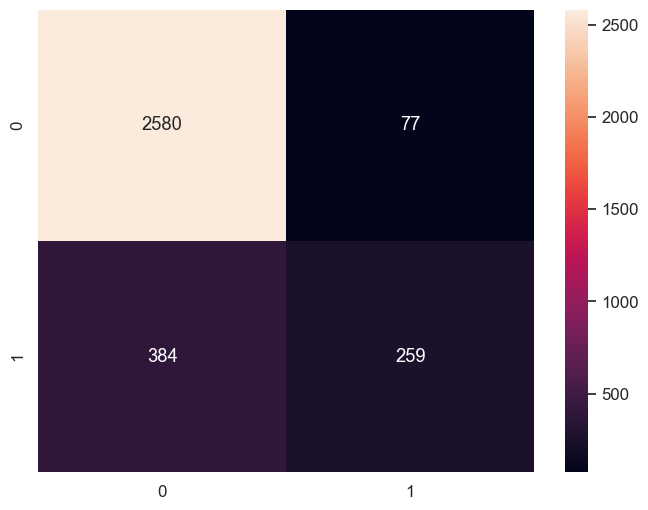

In [ ]:
#cfm


cfm=confusion_matrix(ytest, yp)
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)
ax = sns.heatmap(cfm, annot=True, fmt='d', )


plt.show()

Task 2 from scratch

In [ ]:
generateData=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
trainingData=generateData.flow_from_directory("dataset/training_set", target_size=(64,64), batch_size=32, class_mode='binary')

testPreprocess=ImageDataGenerator(rescale=1./255)
test_set=testPreprocess.flow_from_directory('dataset/test_set', target_size = (64, 64),batch_size = 32,class_mode = 'binary')






Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
cnn=tf.keras.models.Sequential()
#using relu activation
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn

In [ ]:
cnn.add(tf.keras.layers.Flatten())


In [ ]:
cnn.input_shape

(None, 64, 64, 3)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=200, activation='relu'))



In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


training

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = trainingData, validation_data = test_set, epochs = 20)


Epoch 1/20
250/250 [==============================] - 32s 121ms/step - loss: 0.5395 - accuracy: 0.7364 - val_loss: 0.5051 - val_accuracy: 0.7660
Epoch 2/20
250/250 [==============================] - 30s 121ms/step - loss: 0.4978 - accuracy: 0.7594 - val_loss: 0.4793 - val_accuracy: 0.7820
Epoch 3/20
250/250 [==============================] - 30s 120ms/step - loss: 0.4701 - accuracy: 0.7755 - val_loss: 0.4814 - val_accuracy: 0.7770
Epoch 4/20
250/250 [==============================] - 30s 122ms/step - loss: 0.4573 - accuracy: 0.7856 - val_loss: 0.4823 - val_accuracy: 0.7815
Epoch 5/20
250/250 [==============================] - 26s 103ms/step - loss: 0.4538 - accuracy: 0.7856 - val_loss: 0.5336 - val_accuracy: 0.7655
Epoch 6/20
250/250 [==============================] - 31s 122ms/step - loss: 0.4276 - accuracy: 0.7999 - val_loss: 0.4817 - val_accuracy: 0.7735
Epoch 7/20
250/250 [==============================] - 30s 121ms/step - loss: 0.4272 - accuracy: 0.8058 - val_loss: 0.4646 - val_ac

In [ ]:
# Part 4 - Making a single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
trainingData.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 130ms/step
dog


In [ ]:
#now on image 2 which is a cat
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
trainingData.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 27ms/step
cat
